In [2]:
import sys

sys.path.append("..")

!mkdir -p sample-docs
!wget https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/naic-numerical-list-of-companies-page-94.pdf -O sample-docs/companies-list.pdf
!wget https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/mobile-home-manual.pdf -O sample-docs/mobile-home-manual.pdf
!wget https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/meta-2022-10k-page-69.pdf -O sample-docs/meta-10k.pdf

--2024-04-07 21:26:55--  https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/naic-numerical-list-of-companies-page-94.pdf
Resolving sergey-filimonov.nyc3.digitaloceanspaces.com (sergey-filimonov.nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to sergey-filimonov.nyc3.digitaloceanspaces.com (sergey-filimonov.nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12281 (12K) [application/pdf]
Saving to: ‘sample-docs/companies-list.pdf’

sample-docs/compani 100%[===================>]  11.99K  --.-KB/s    in 0s      

2024-04-07 21:26:55 (5.72 GB/s) - ‘sample-docs/companies-list.pdf’ saved [12281/12281]

--2024-04-07 21:26:55--  https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/mobile-home-manual.pdf
Resolving sergey-filimonov.nyc3.digitaloceanspaces.com (sergey-filimonov.nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to sergey-filimonov.nyc3.digitaloceanspaces

## 1. Basic Extraction

In [3]:
import openparse

basic_doc_path = "./sample-docs/mobile-home-manual.pdf"
parser = openparse.DocumentParser()
parsed_basic_doc = parser.parse(basic_doc_path)

for node in parsed_basic_doc.nodes:
    display(node)

**RULE 9 - 55 AND RETIRED DISCOUNT**<br><br>If the following criteria are met, reduce the otherwise applicable Standard or Deluxe Policy 
Package Premium by 10%. <br><br>1.  One of the Named Insureds must be age 55 or older. <br><br>2. 
Both the Named Insured and Spouse, if any, are not presently gainfully employed full-
time or actively seeking full-time gainful employment. <br><br>3.  The Insured Residence must be the Principal Residence of the Applicant. 

**RULE 10 - CLASSIFICATION**<br><br>Mobile Homes are classified either Class 1 or Class 2. <br><br>1. <br><br>Class 1 rates and premiums apply to owner-occupied one-family Mobile Home which 
meet the following requirements: <br><br>a.  Principal residence of occupant <br><br>b.  Used exclusively for residential purposes <br><br>2. 
All other mobile homes are Class 2. Premiums are determined by applying the factor 
shown on the Supplementary Rate Page. 

**RULE 11 - PREMIUM DETERMINATION**<br><br>The premium calculations should be done in the following order. <br><br>A. Determine the Package Premium for Class 1 Mobile Home from the State Rate Pages 
according to the Territorial Zone, type of policy, tie down status, deductible, park size, 
premium group, and purchase price. <br><br>B. Multiply the appropriate Package Premium amount by a Rate Adjustment Factor of 1.398. <br><br>C. Apply the deductible factor, if applicable. <br><br>D. Apply the Out-of-Park Surcharge, if applicable. <br><br>E. Apply the original owner discount, if applicable. <br><br>F. Apply the protective device discount, if applicable. <br><br>G. Apply the 55 and retired discount, if applicable. <br><br>H. For Class 2 Mobile Home, apply the Class 2 factor. <br><br>I. Apply The Good Hands People Discount, if applicable. 

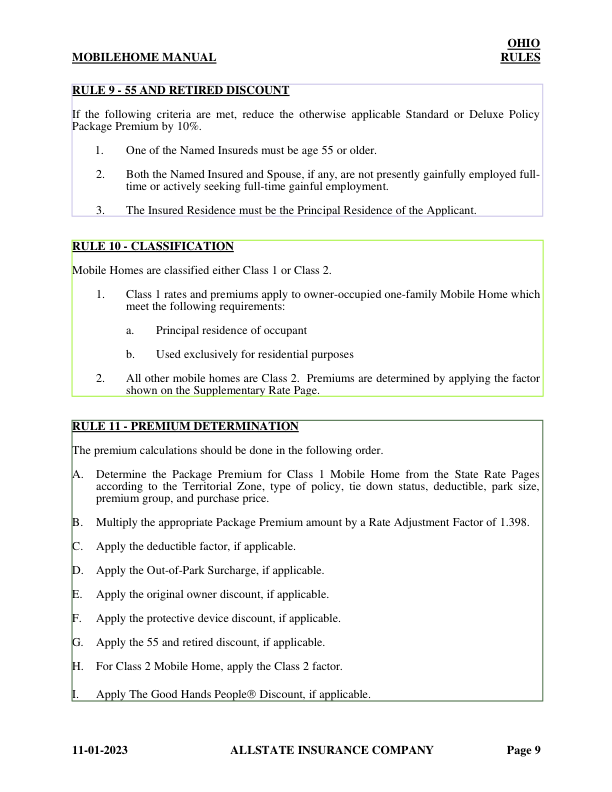

In [4]:
# you can also easily display the nodes on the actual document

pdf = openparse.Pdf(basic_doc_path)
pdf.display_with_bboxes(
    parsed_basic_doc.nodes,
)

## 2. Serialization:

OpenParse returns pydantic models that can easily be serialized

In [5]:
parsed_basic_doc.model_dump()

{'nodes': [{'variant': {'text'},
   'tokens': 107,
   'bbox': [{'page': 0,
     'page_height': 792.0,
     'page_width': 612.0,
     'x0': 72.05,
     'y0': 575.79,
     'x1': 542.78,
     'y1': 707.83}],
   'text': '**RULE 9 - 55 AND RETIRED DISCOUNT**<br><br>If the following criteria are met, reduce the otherwise applicable Standard or Deluxe Policy \nPackage Premium by 10%. <br><br>1.  One of the Named Insureds must be age 55 or older. <br><br>2. \nBoth the Named Insured and Spouse, if any, are not presently gainfully employed full-\ntime or actively seeking full-time gainful employment. <br><br>3.  The Insured Residence must be the Principal Residence of the Applicant. '},
  {'variant': {'text'},
   'tokens': 95,
   'bbox': [{'page': 0,
     'page_height': 792.0,
     'page_width': 612.0,
     'x0': 72.05,
     'y0': 395.72,
     'x1': 543.18,
     'y1': 551.76}],
   'text': '**RULE 10 - CLASSIFICATION**<br><br>Mobile Homes are classified either Class 1 or Class 2. <br><br>1. <br><

## Tables

We aim to be model agnostic - the DocumentParser supports extracting tables using either the "table-transformers" or "pymupdf" libraries - we're model agnostic. The `parsing_algorithm` field in the configuration dictionary decides which one to use.

The `PyMuPDFArgsDict` (and similarly the `TableTransformersArgsDict`) lets you fine-tune how tables are extracted using specific arguments.

In [6]:
doc_with_tables_path = "./sample-docs/companies-list.pdf"

parser = openparse.DocumentParser(
    table_args={"parsing_algorithm": "table-transformers"}
)
parsed_doc2 = parser.parse(doc_with_tables_path)

for node in parsed_doc2.nodes:
    display(node)

<table border="1">
<thead>
<tr>
<th style="min-width:171px;">GROUP NAME</th>
<th style="min-width:156px;">GROUP</th>
<th style="min-width:51px;">CO NO</th>
<th style="min-width:40px;">STMT</th>
<th style="min-width:45px;">STATUS</th>
<th style="min-width:26px;">ST</th>
<th style="min-width:168px;">COMPANY NAME</th>
</tr>
</thead>
<tbody>
<tr>
<td style="min-width:171px;">CVS GRP</td>
<td style="min-width:156px;">1</td>
<td style="min-width:51px;">15827</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">PA</td>
<td style="min-width:168px;">AETNA HLTH ASSUR PA INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95935</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">CT</td>
<td style="min-width:168px;">AETNA HLTH INC CT CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95088</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">FL</td>
<td style="min-width:168px;">AETNA HLTH INC FL CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95094</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">GA</td>
<td style="min-width:168px;">AETNA HLTH INC GA CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95517</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">ME</td>
<td style="min-width:168px;">AETNA HLTH INC ME CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95287</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">NJ</td>
<td style="min-width:168px;">AETNA HLTH INC NJ CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95234</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">NY</td>
<td style="min-width:168px;">AETNA HLTH INC NY CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95109</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">PA</td>
<td style="min-width:168px;">AETNA HLTH INC PA CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95490</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">TX</td>
<td style="min-width:168px;">AETNA HLTH INC TX CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">72052</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">PA</td>
<td style="min-width:168px;">AETNA HLTH INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">84450</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">NY</td>
<td style="min-width:168px;">AETNA HLTH INS CO OF NY</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95241</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">IA</td>
<td style="min-width:168px;">AETNA HLTH OF IA INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95756</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MI</td>
<td style="min-width:168px;">AETNA HLTH OF MI INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">15805</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">OH</td>
<td style="min-width:168px;">AETNA HLTH OF OH INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95407</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">UT</td>
<td style="min-width:168px;">AETNA HLTH OF UTAH INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">60054</td>
<td style="min-width:40px;">L</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">CT</td>
<td style="min-width:168px;">AETNA LIFE INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">17352</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MN</td>
<td style="min-width:168px;">ALLINA HLTH & AETNA HLTH PLAN INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">16194</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MN</td>
<td style="min-width:168px;">ALLINA HLTH & AETNA INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">12321</td>
<td style="min-width:40px;">L</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">TN</td>
<td style="min-width:168px;">AMERICAN CONTINENTAL INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">16058</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">AZ</td>
<td style="min-width:168px;">BANNER HLTH & AETNA HLTH INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">16059</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">AZ</td>
<td style="min-width:168px;">BANNER HLTH & AETNA HLTH PLAN INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">68500</td>
<td style="min-width:40px;">L</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">TN</td>
<td style="min-width:168px;">CONTINENTAL LIFE INS CO BRENTWOOD</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">81973</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MO</td>
<td style="min-width:168px;">COVENTRY HLTH & LIFE INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">74160</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">IL</td>
<td style="min-width:168px;">COVENTRY HLTH CARE OF IL INC</td>
</tr>
</tbody>
</table>

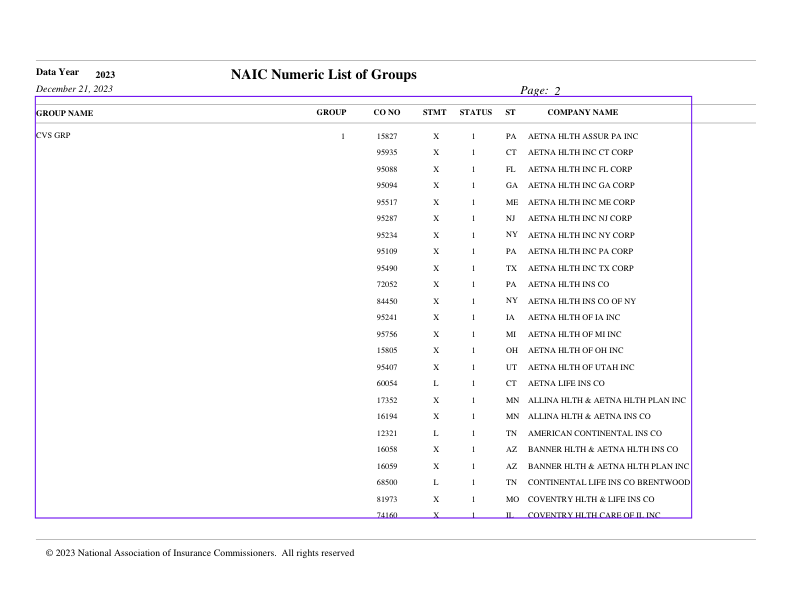

In [7]:
pdf = openparse.Pdf(doc_with_tables_path)
pdf.display_with_bboxes(
    parsed_doc2.nodes,
)

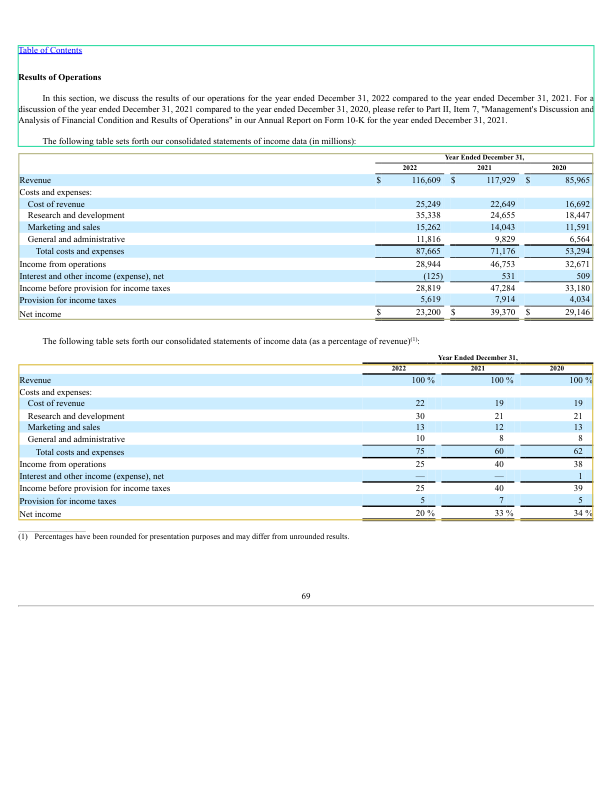

In [8]:
meta10k_path = "./sample-docs/meta-10k.pdf"

parser = openparse.DocumentParser(table_args={"parsing_algorithm": "pymupdf"})
parsed_10k = parser.parse(meta10k_path)

doc = openparse.Pdf(file=meta10k_path)
doc.display_with_bboxes(parsed_10k.nodes)

## 3. Custom Processing (Advanced)

While we've chosen sensible defaults, you can add custom processing functions to the `DocumentParser` class to further process the extracted data.

This allows use cases like:
- Using embeddings to parse nodes split across pages
- Use GPT-4V to choose which nodes to combine

Combining concurrent tables


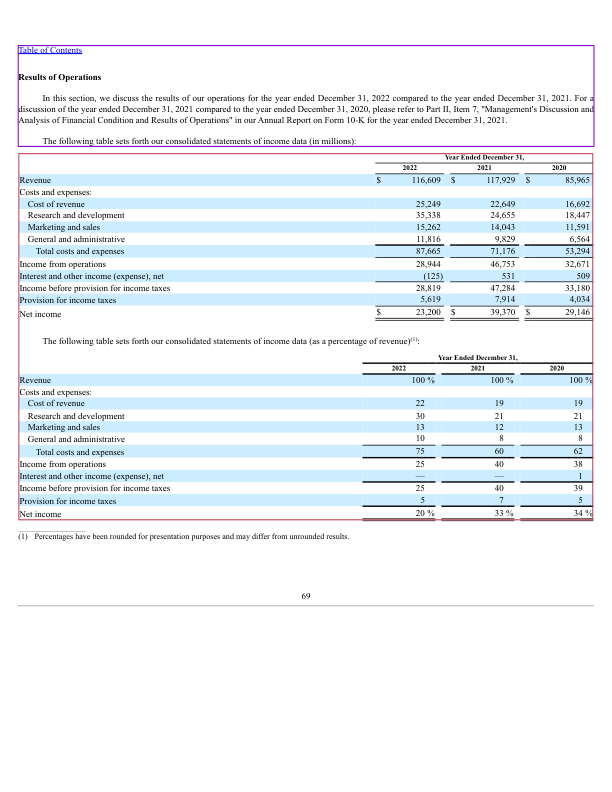

In [11]:
from openparse import processing, Node
from typing import List


class CustomCombineTables(processing.ProcessingStep):
    """
    Let's combine tables that are next to each other
    """

    def process(self, nodes: List[Node]) -> List[Node]:
        new_nodes = []
        print("Combining concurrent tables")
        for i in range(len(nodes) - 1):
            if "table" in nodes[i].variant and "table" in nodes[i + 1].variant:
                new_node = nodes[i] + nodes[i + 1]
                new_nodes.append(new_node)
            else:
                new_nodes.append(nodes[i])

        return new_nodes


# copy the default pipeline (or create a new one)
custom_pipeline = default_pipeline.copy()
custom_pipeline.append(CustomCombineTables())

parser = openparse.DocumentParser(
    table_args={"parsing_algorithm": "pymupdf"}, processing_pipeline=custom_pipeline
)
custom_10k = parser.parse(meta10k_path)

doc = openparse.Pdf(file=meta10k_path)
doc.display_with_bboxes(custom_10k.nodes)